In [50]:
from sklearn.preprocessing import LabelEncoder
import pymysql
import pandas as pd
import torch

db = pymysql.connect(host="localhost", database="movie", user="root", password="ly.19720424")
cursor = db.cursor()
sql = "select * from movie_detail3"
cursor.execute(sql)
data1 = cursor.fetchone()
data = cursor.fetchall()
# print(list(data))
columns = ['name', 'director', 'screenWriter', 'actors', 'type', 'rate']
movie = pd.DataFrame(list(data), columns=columns)
movie

,name,director,screenWriter,actors,type,rate
0,#活着 #살아있다,赵一亨,赵一亨 马特·奈勒,刘亚仁 朴信惠 李铉旭 全裴修 苏熙静 金丹菲 乔汉俊,动作 惊悚 灾难,5.7
1,007：大战皇家赌场 Casino Royale,马丁·坎贝尔,尼尔·珀维斯 罗伯特·韦德 保罗·哈吉斯 伊恩·弗莱明,丹尼尔·克雷格 伊娃·格林 麦斯·米科尔森 朱迪·丹奇 杰弗里·怀特 吉安卡罗·吉安尼尼 卡...,剧情 动作 惊悚,7.6
2,007：大破天幕杀机 Skyfall,萨姆·门德斯,尼尔·珀维斯 罗伯特·韦德 约翰·洛根,丹尼尔·克雷格 朱迪·丹奇 哈维尔·巴登 拉尔夫·费因斯 娜奥米·哈里斯 贝纳尼丝·玛尔洛 ...,动作 惊悚 冒险,7.1
3,007：大破量子危机 Quantum of Solace,马克·福斯特,保罗·哈吉斯 尼尔·珀维斯 罗伯特·韦德,丹尼尔·克雷格 欧嘉·柯瑞兰寇 马修·阿马立克 朱迪·丹奇 吉安卡罗·吉安尼尼 杰玛·阿特登...,动作 惊悚 冒险,6.6
4,007：幽灵党 Spectre,萨姆·门德斯,约翰·洛根 尼尔·珀维斯 罗伯特·韦德 杰斯·巴特沃斯 伊恩·弗莱明,丹尼尔·克雷格 克里斯托弗·瓦尔兹 蕾雅·赛杜 本·卫肖 娜奥米·哈里斯 戴夫·巴蒂斯塔 莫...,动作 惊悚 冒险,6.4
5,1/2的魔法 Onward,丹·斯坎隆,丹·斯坎隆 基思·布宁,汤姆·赫兰德 克里斯·帕拉特 茱莉亚·路易斯-德瑞弗斯 奥克塔维亚·斯宾瑟 梅尔·罗德里格斯...,喜剧 动画 奇幻,7.7
6,101忠狗 One Hundred and One Dalmatians,克莱德·杰洛尼米 汉密尔顿·卢斯科 沃夫冈·雷瑟曼,比尔·皮特 道迪·史密斯,罗德·泰勒 凯特·鲍尔 本·怀特 丽莎·戴维斯 贝蒂·洛乌·格尔森 J·帕特·奥马利 玛莎·...,喜剧 动画 家庭,8.4
7,101次求婚,陈正道,张巍 任鹏,黄渤 林志玲 高以翔 秦海璐 武田铁矢 王迅,爱情,5.7
8,12夜,林爱华,林爱华,张柏芝 陈奕迅 卢巧音 张燊悦 区淑贞 卓韵芝 谢霆锋 冯德伦 郑中基,剧情 爱情,8.2
9,1917,萨姆·门德斯,萨姆·门德斯 克里斯蒂·威尔逊-凯恩斯,乔治·麦凯 迪恩·查尔斯·查普曼 科林·费尔斯 本尼迪克特·康伯巴奇 马克·斯特朗 理查德·...,剧情 战争,8.5


In [3]:
print("================特征值重复率================")
for item in columns:
    print("% s\t" % item, movie[item].duplicated().sum()/movie.shape[0])

================特征值重复率================
name	 0.0
director	 0.4245535714285714
screenWriter	 0.13348214285714285
actors	 0.0040178571428571425
type	 0.8459821428571429
rate	 0.9683035714285714


In [4]:
# 将type这一离散值特征转换为连续值特征 进行哑编码
print(movie.shape)
movie_type = pd.get_dummies(movie['type'], dummy_na=True)
print(movie_type.shape)

(2240, 6)
(2240, 346)


In [5]:
# 对actors进行标签编码
actors_le = LabelEncoder()
actors_le.fit(movie['actors'])
actors_le.transform(movie['actors'])

array([ 282,   30,   33, ..., 1482, 1385, 1065])

In [6]:
from category_encoders.target_encoder import TargetEncoder

In [7]:
movie_rate = movie['rate'].astype(float)

In [8]:
# 对director screenWriter 进行目标编码
d_sW_enc = TargetEncoder(cols=['director','screenWriter']).fit(movie,movie_rate)

In [9]:
movie2 = d_sW_enc.transform(movie,movie_rate)

In [10]:
movie2['actors_enc'] = actors_le.transform(movie['actors'])
# 整合数据
movie2 = pd.concat([movie2,movie_type],axis=1)

In [11]:
movie2.drop(columns=['actors','type','语言: 上映日期: 2019-11-01(中国大陆网络)'],inplace=True)

In [12]:
movie2.drop(columns='name',inplace=True)

In [51]:
# 查看处理后的数据信息
movie2 = movie2.astype(float)
movie2.info

<bound method DataFrame.info of       director  screenWriter  rate  actors_enc        冒险   剧情  剧情 传记  \
0     7.428036      7.428036   5.7       282.0  0.0  0.0  0.0    0.0   
1     6.904224      7.428036   7.6        30.0  0.0  0.0  0.0    0.0   
2     7.714749      7.428036   7.1        33.0  0.0  0.0  0.0    0.0   
3     7.432702      7.428036   6.6        34.0  0.0  0.0  0.0    0.0   
4     7.714749      7.428036   6.4        31.0  0.0  0.0  0.0    0.0   
5     7.809622      7.428036   7.7      1321.0  0.0  0.0  0.0    0.0   
6     7.428036      7.428036   8.4      1575.0  0.0  0.0  0.0    0.0   
7     6.901228      7.428036   5.7      2206.0  0.0  0.0  0.0    0.0   
8     6.713034      7.444093   8.2       841.0  0.0  0.0  0.0    0.0   
9     7.714749      7.428036   8.5        67.0  0.0  0.0  0.0    0.0   
10    8.397597      7.428036   8.8       251.0  0.0  0.0  0.0    0.0   
11    7.466408      7.428036   7.9      1521.0  0.0  0.0  0.0    0.0   
12    8.336322      8.369096   7

In [14]:
from torch import nn
from torch.utils import data
from torch import optim
import matplotlib.pyplot as plt
from IPython import display

In [27]:
# 导入数据
train_features = torch.tensor(movie2.values)
train_labels = torch.tensor(movie_rate.values)
in_features = train_features.shape[1]

In [ ]:
# 定义损失函数
loss = nn.MSELoss()
# 模型1：线性回归模型
def net(feature_num):
    net = nn.Sequential(nn.Linear(feature_num,1))
                    
    #初始化模型参数
    for params in net.parameters():
        nn.init.normal_(params,mean=0,std=0.01)
    return net

In [28]:
loss = nn.MSELoss()
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net

In [31]:
# 模型2：MLP多层感知器 两层隐藏层
net2 = nn.Sequential(nn.Flatten(), nn.Linear(349,128), nn.ReLU(), nn.Linear(128,1))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net2.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=349, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=1, bias=True)
)

In [46]:
# 模型3：MLP多层感知器 三层隐藏层
net3 = nn.Sequential(nn.Flatten(),nn.Linear(349,128),nn.ReLU(),nn.Linear(128,64),
                     nn.ReLU(),nn.Linear(64,1))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net3.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=349, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=1, bias=True)
)

In [36]:
# 定义对数均方根误差
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features.float()), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()

In [17]:
# 训练模型
def train(net,train_features,train_labels,test_features,test_labels,
          num_epochs,learning_rate,weight_decay,batch_size):
    
    train_ls,test_ls = [],[] # 计算训练集和测试集损失
    dataset = data.TensorDataset(train_features,train_labels)
    data_iter = data.DataLoader(dataset,batch_size,shuffle=True)
    # 优化器：adam
    optimizer = optim.Adam(params=net.parameters(),lr=learning_rate,
                           weight_decay=weight_decay)
    net = net.float()
    for epoch in range(num_epochs):
        for x,y in data_iter:
            l = loss(net(x.float()),y.float()) # 计算损失
            optimizer.zero_grad() # 梯度归零
            l.backward() # 反向传播
            optimizer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net,test_features,test_labels))
    return train_ls,test_ls

In [18]:
def get_k_fold_data(k,i,X,y):
    assert k > 1
    fold_size = X.shape[0] // k
    x_train,y_train = None,None
    for j in range(k):
        idx = slice(j*fold_size,(j+1)*fold_size,1)
#         print(idx)
        x_part ,y_part = X[idx,:],y[idx]
        if j == i:
            x_valid,y_valid = x_part,y_part
        elif x_train is None:
            x_train,y_train = x_part,y_part
        else:
            x_train = torch.cat((x_train,x_part),dim=0)
            y_train = torch.cat((y_train,y_part),dim=0)
    return x_train,y_train,x_valid,y_valid

In [19]:
# 画图
def use_svg_display():
    # 用矢量图表示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize = (3.5,2.5)):
    use_svg_display()
    # 设置图像尺寸
    plt.rcParams['figure.figsize'] = figsize

# 半对数函数
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,
             legend=None,figsize=(3.5,2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)
    plt.show()

In [47]:
def k_fold(k,x_train,y_train,num_epochs,learning_rate,weight_decay,batch_size):
    train_l_sum,valid_l_sum = 0,0
    for i in range(k):
        data = get_k_fold_data(k,i,x_train,y_train)
#         net1 = net(x_train.shape[1])
        train_ls,valid_ls = train(net3,*data,num_epochs,learning_rate,
                                 weight_decay,batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i==0:
            semilogy(range(1,num_epochs + 1),train_ls,'epoch','rmse',
                     range(1,num_epochs + 1),valid_ls,['train','valid'])
        print('fold %d, train rmse %f, valid rmse %f' % 
              (i,train_ls[-1],valid_ls[-1]))
    return train_l_sum/k,valid_l_sum/k

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(

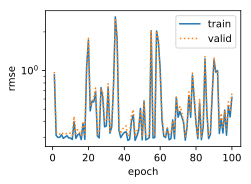

fold 0, train rmse 0.617832, valid rmse 0.666888
fold 1, train rmse 1.321635, valid rmse 1.340609
fold 2, train rmse 0.294506, valid rmse 0.290190
fold 3, train rmse 0.356819, valid rmse 0.348698
fold 4, train rmse 1.973307, valid rmse 1.943761
5-fold validation ：avg train rmse 0.912820 ,avg valid rmse 0.918029


In [23]:
# 模型1
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.01, 32

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_los

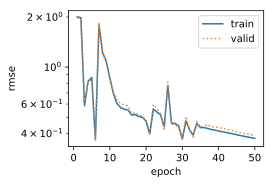

fold 0, train rmse 0.372967, valid rmse 0.387551
fold 1, train rmse 0.203709, valid rmse 0.214461
fold 2, train rmse 0.210666, valid rmse 0.208157
fold 3, train rmse 0.205336, valid rmse 0.191516
fold 4, train rmse 0.242696, valid rmse 0.238692
5-fold validation ：avg train rmse 0.247075 ,avg valid rmse 0.248076


In [38]:
# 模型2
k, num_epochs, lr, weight_decay, batch_size = 5, 50, 0.1, 0.01, 256

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_los

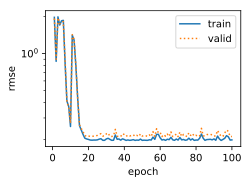

fold 0, train rmse 0.199154, valid rmse 0.212305
fold 1, train rmse 0.198755, valid rmse 0.207753
fold 2, train rmse 0.201059, valid rmse 0.198089
fold 3, train rmse 0.202746, valid rmse 0.187504
fold 4, train rmse 0.201476, valid rmse 0.192581
5-fold validation ：avg train rmse 0.200638 ,avg valid rmse 0.199646


In [43]:
# 模型2
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.01, 256

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_los

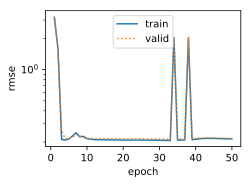

fold 0, train rmse 0.214102, valid rmse 0.217423
fold 1, train rmse 0.219404, valid rmse 0.226166
fold 2, train rmse 0.201606, valid rmse 0.198615
fold 3, train rmse 0.215893, valid rmse 0.199054
fold 4, train rmse 0.204107, valid rmse 0.196110
5-fold validation ：avg train rmse 0.211022 ,avg valid rmse 0.207473


In [45]:
# 模型2
k, num_epochs, lr, weight_decay, batch_size = 5, 50, 0.25, 0.01, 256

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_los

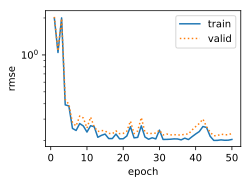

fold 0, train rmse 0.204681, valid rmse 0.229027
fold 1, train rmse 1.153954, valid rmse 1.125505
fold 2, train rmse 0.358347, valid rmse 0.321075
fold 3, train rmse 1.986453, valid rmse 2.006541
fold 4, train rmse 0.201651, valid rmse 0.194051
5-fold validation ：avg train rmse 0.781017 ,avg valid rmse 0.775240


In [48]:
# 模型3
k, num_epochs, lr, weight_decay, batch_size = 5, 50, 0.25, 0.01, 256

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))

D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1792])) that is different to the input size (torch.Size([1792, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_los

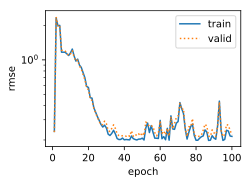

fold 0, train rmse 0.214857, valid rmse 0.220995
fold 1, train rmse 0.201203, valid rmse 0.211347
fold 2, train rmse 0.508853, valid rmse 0.512322
fold 3, train rmse 0.205275, valid rmse 0.194704
fold 4, train rmse 0.201443, valid rmse 0.192569
5-fold validation ：avg train rmse 0.266326 ,avg valid rmse 0.266387


In [49]:
# 模型3
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.01, 256

train_l, valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,
                          weight_decay,batch_size)
print('%d-fold validation ：avg train rmse %f ,avg valid rmse %f' %(k,train_l,valid_l))